In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getData(file):
    if file.endswith('.xz'): file = lzma.open(file, 'rt')
    data = pd.read_json(file)
    data = data.sort_values(['file', 'method'])
    
    # Adding a column for the database
    data['db'] = -1 + \
        (0+1)*data.file.str.endswith(')') + \
        (1+1)*data.file.str.contains('/Prover9--') + \
        (2+1)*data.file.str.contains('/E---1') + \
        (3+1)*data.file.str.contains('/leanCoP--') + \
        (4+1)*data.file.str.contains('/QF_UF/')
    
    data['status'] = data.status.fillna("timeout_" + data.phase)
    
    return data

In [3]:
filename = "results.json.xz"
data = None
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
data_other_exp[['method', 'file', 'status']]

,method,file,status
1073486,1_maxsat,FactorialFunctionEqualityExampleProof(52),cutintro_other_exception
1073484,2_2_maxsat,FactorialFunctionEqualityExampleProof(52),cutintro_other_exception
378120,1_1_maxsat,FactorialFunctionEqualityExampleProof(53),cutintro_other_exception
378123,1_dtable,FactorialFunctionEqualityExampleProof(53),cutintro_other_exception
217480,1_1_maxsat,FactorialFunctionEqualityExampleProof(54),cutintro_other_exception
217484,2_2_maxsat,FactorialFunctionEqualityExampleProof(54),cutintro_other_exception
217481,2_maxsat,FactorialFunctionEqualityExampleProof(54),cutintro_other_exception
217487,many_dtable_ss,FactorialFunctionEqualityExampleProof(54),cutintro_other_exception
217485,reforest,FactorialFunctionEqualityExampleProof(54),cutintro_other_exception
1056448,1_1_maxsat,FactorialFunctionEqualityExampleProof(55),cutintro_other_exception


In [5]:
# Test that fail for 1_dtable and are ok in 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat == 'ok') & (merged.status_dtable != 'ok')][['file', 'status_dtable']]

,file,status_dtable
214,LinearEqExampleProof(19),timeout_grammar
216,LinearEqExampleProof(20),timeout_grammar
217,LinearEqExampleProof(21),timeout_grammar
218,LinearEqExampleProof(22),timeout_grammar
219,LinearEqExampleProof(23),timeout_grammar
220,LinearEqExampleProof(24),timeout_grammar
221,LinearEqExampleProof(25),timeout_grammar
222,LinearEqExampleProof(26),timeout_grammar
223,LinearEqExampleProof(27),timeout_grammar
224,LinearEqExampleProof(28),timeout_grammar


In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat != 'ok') & (merged.status_dtable == 'ok')][['file', 'status_maxsat']]

,file,status_maxsat
305,LinearExampleProof(10),cutintro_uncompressible
307,LinearExampleProof(11),cutintro_uncompressible
309,LinearExampleProof(13),cutintro_uncompressible
310,LinearExampleProof(14),cutintro_uncompressible
311,LinearExampleProof(15),cutintro_uncompressible
314,LinearExampleProof(18),cutintro_uncompressible
315,LinearExampleProof(19),cutintro_uncompressible
338,LinearExampleProof(4),cutintro_uncompressible
360,LinearExampleProof(6),cutintro_uncompressible
382,LinearExampleProof(8),cutintro_uncompressible


In [7]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'E',
    3: 'LeanCoP',
    4: 'VeriT',
}

dbs = { i: dbs[i] for i in dbs.keys() if i in data.db.values }

In [8]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 1212
Proof examples - 1_dtable: 1212
Proof examples - 1_maxsat: 1212
Proof examples - 2_2_maxsat: 1212
Proof examples - 2_maxsat: 1212
Proof examples - many_dtable: 1212
Proof examples - many_dtable_ss: 1212
Proof examples - reforest: 1212

Prover9 - 1_1_maxsat: 6394
Prover9 - 1_dtable: 6394
Prover9 - 1_maxsat: 6394
Prover9 - 2_2_maxsat: 6394
Prover9 - 2_maxsat: 6394
Prover9 - many_dtable: 6394
Prover9 - many_dtable_ss: 6394
Prover9 - reforest: 6394

E - 1_1_maxsat: 9895
E - 1_dtable: 9895
E - 1_maxsat: 9895
E - 2_2_maxsat: 9895
E - 2_maxsat: 9895
E - many_dtable: 9895
E - many_dtable_ss: 9895
E - reforest: 9895

LeanCoP - 1_1_maxsat: 2738
LeanCoP - 1_dtable: 2738
LeanCoP - 1_maxsat: 2738
LeanCoP - 2_2_maxsat: 2738
LeanCoP - 2_maxsat: 2738
LeanCoP - many_dtable: 2738
LeanCoP - many_dtable_ss: 2738
LeanCoP - reforest: 2738

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 14

In [9]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

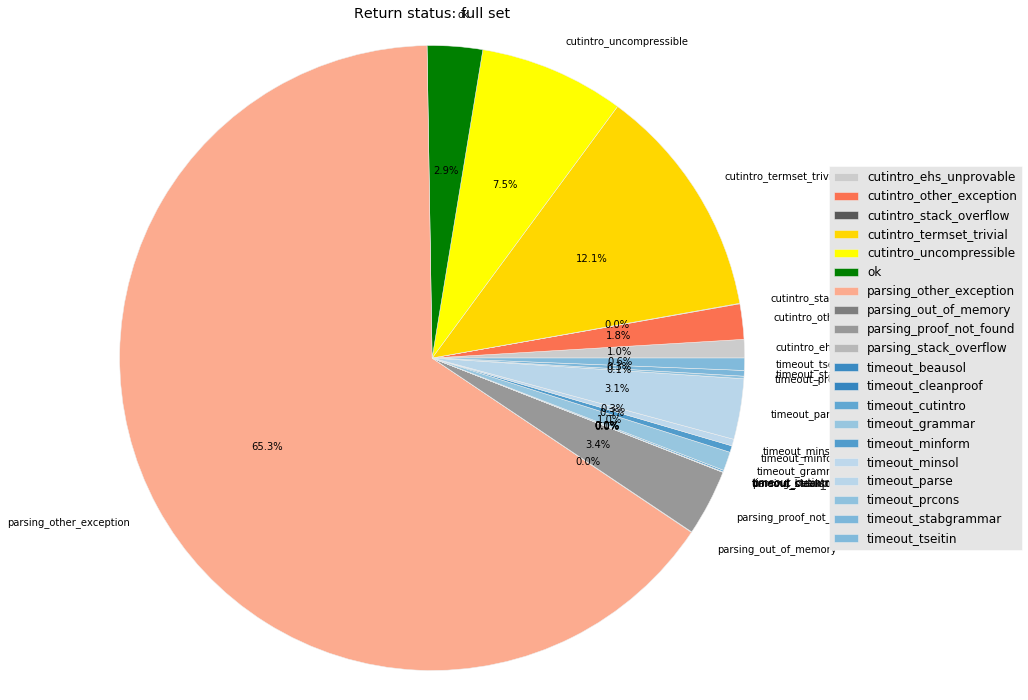

In [10]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

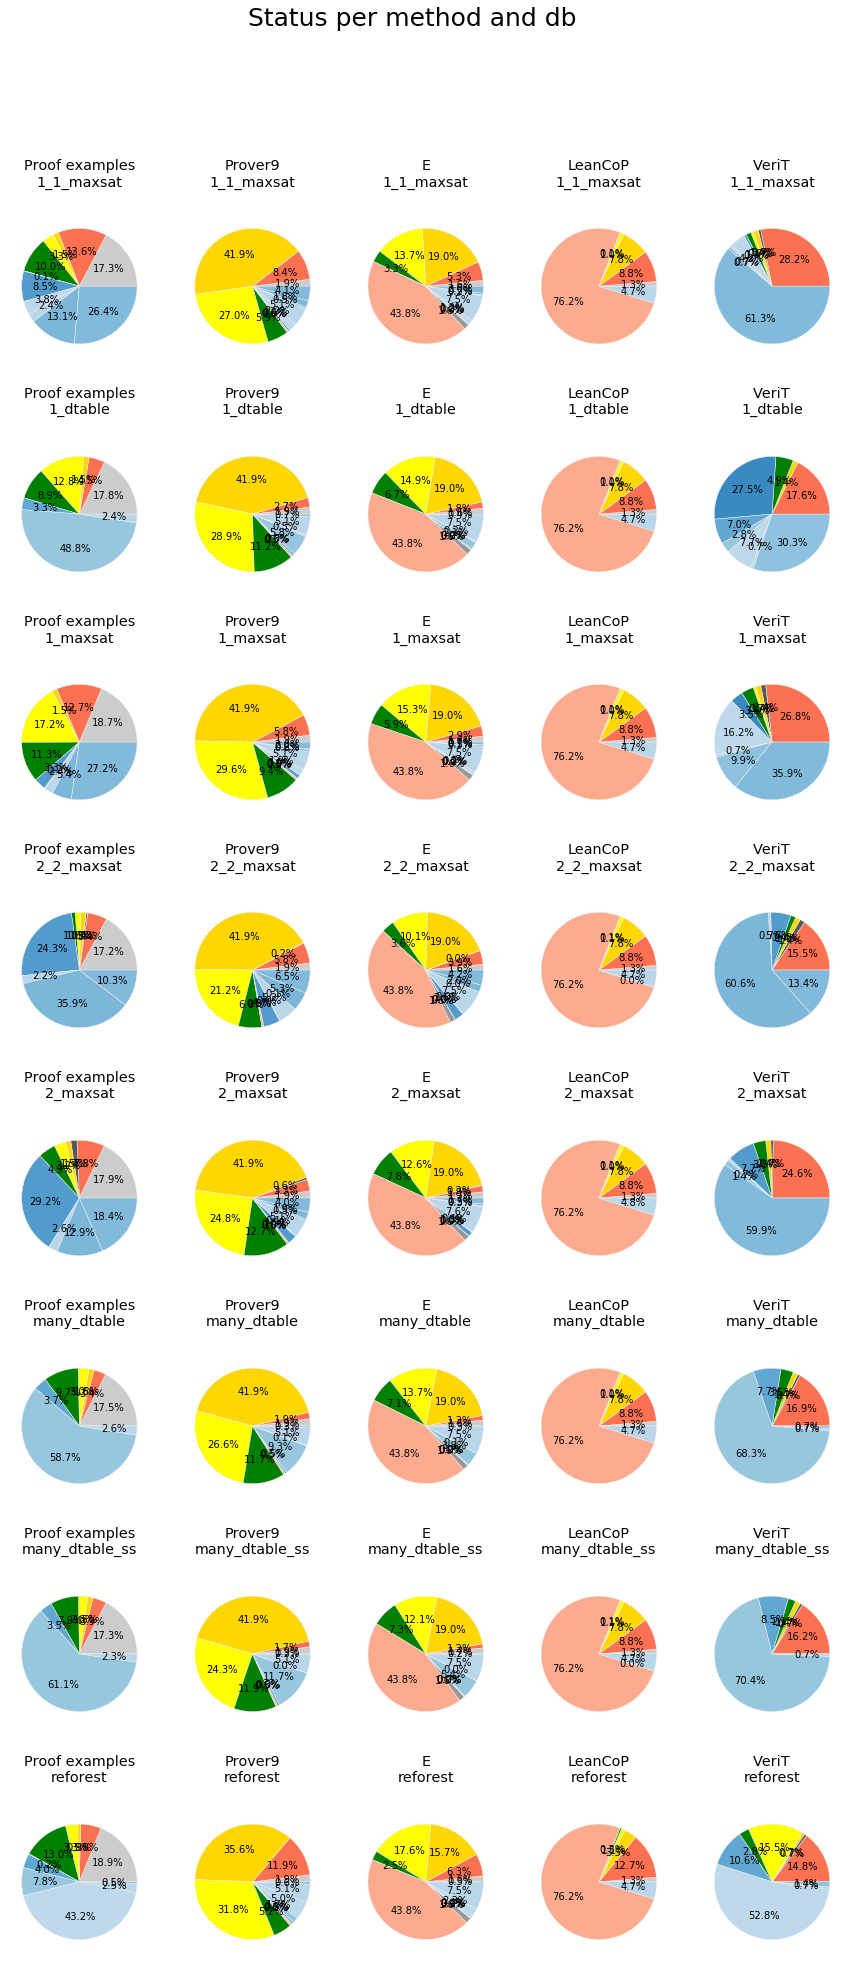

In [11]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(3*xsize,4*ysize))
plt.suptitle('Status per method and db', fontsize=25)
for j, (dbi, db) in enumerate(dbs.items()):
    for i, method in enumerate(methods):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, legend=False)

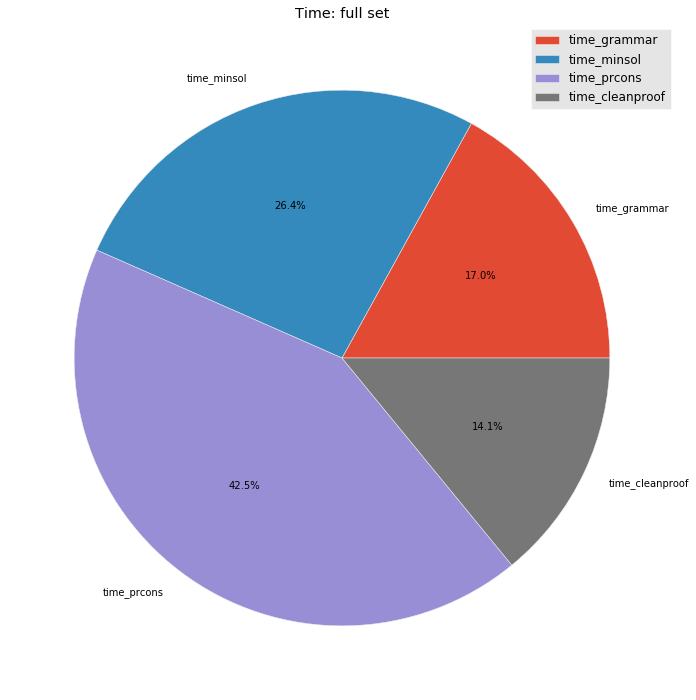

In [12]:
timecols = ['time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

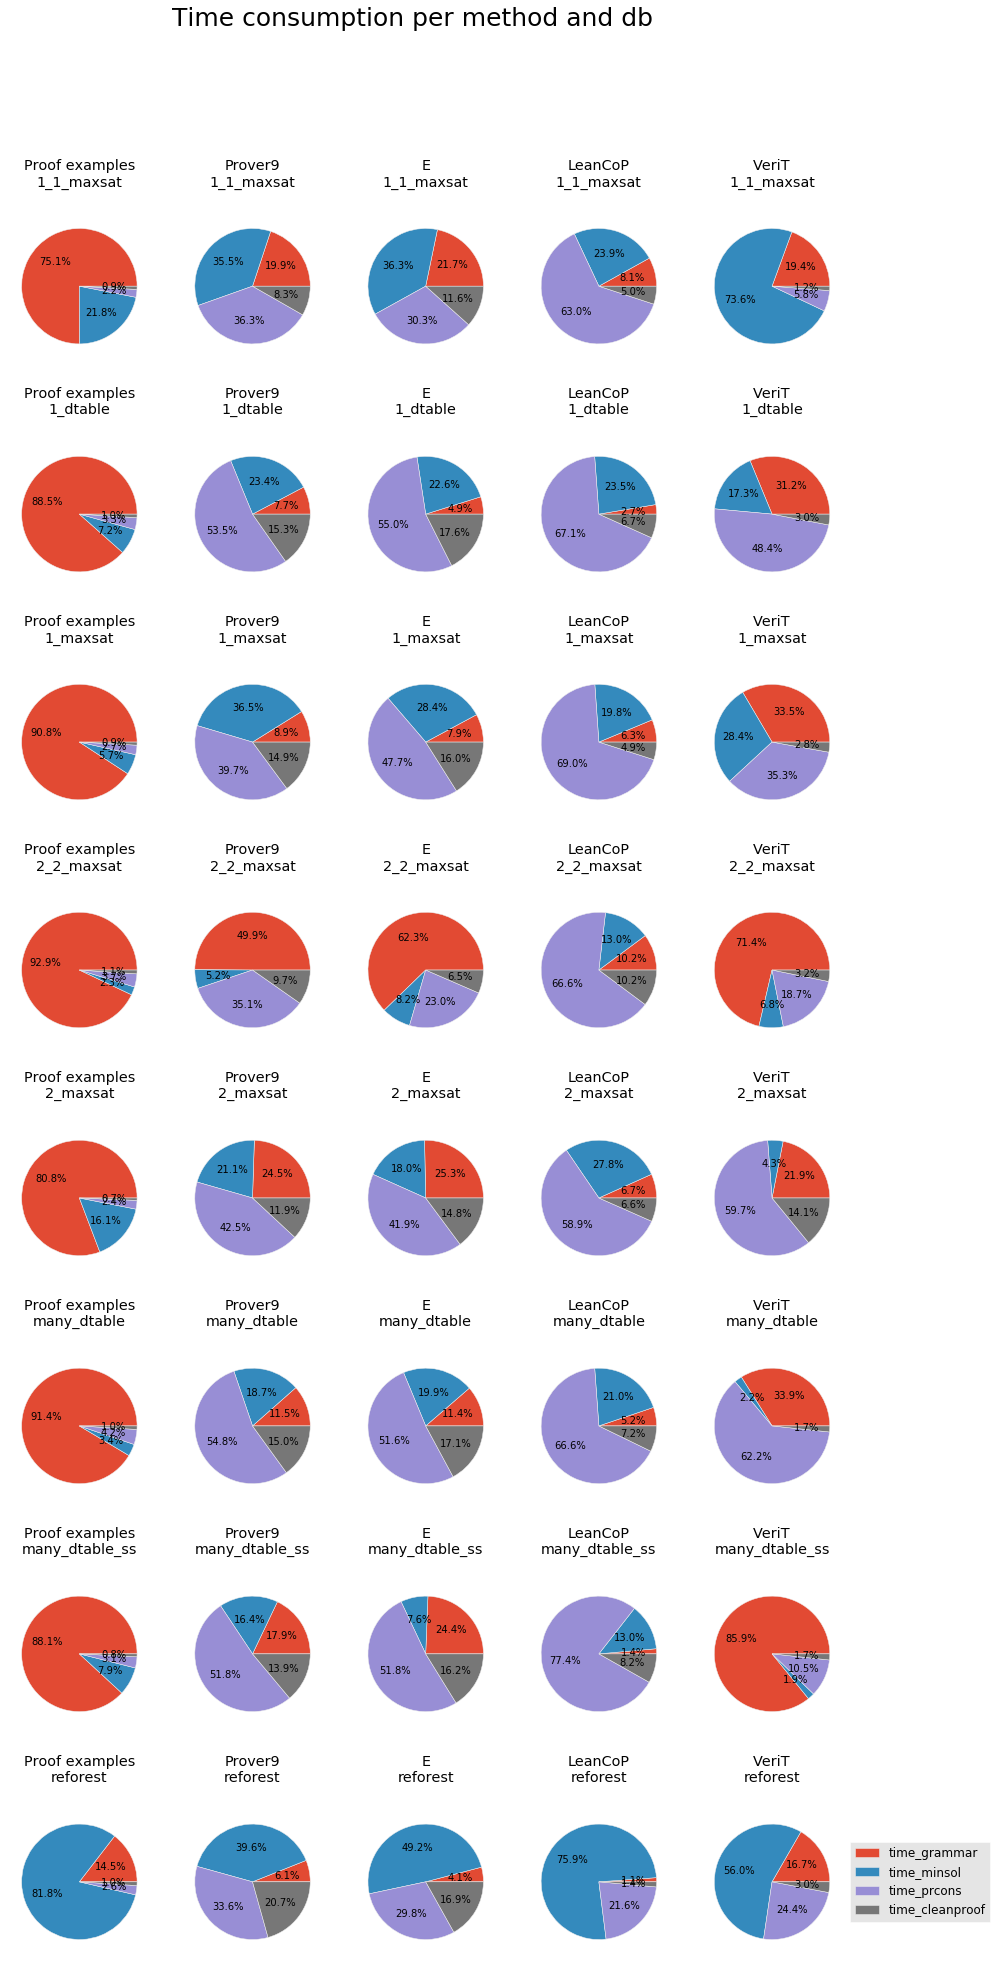

In [13]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(3*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

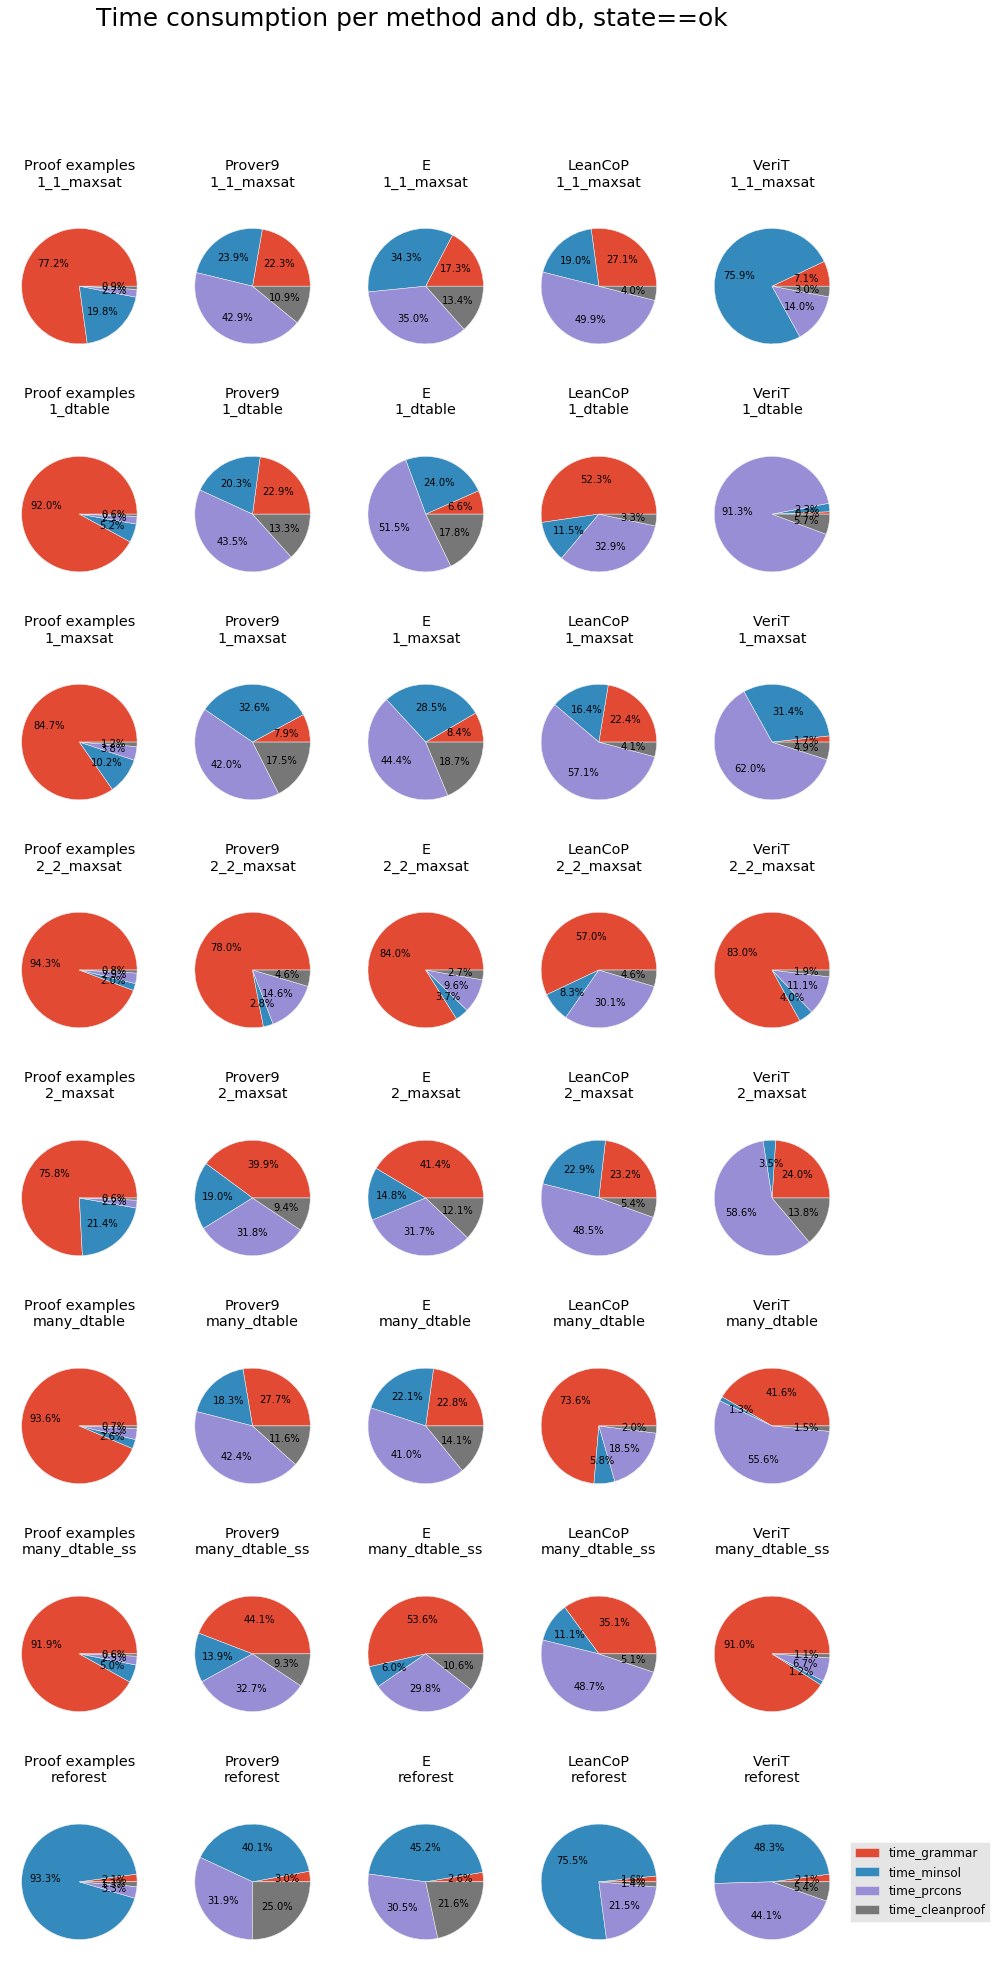

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(3*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
data['status'].value_counts()

parsing_other_exception     728191
cutintro_termset_trivial    134763
cutintro_uncompressible      83738
parsing_proof_not_found      38257
timeout_parse                34900
ok                           31840
cutintro_other_exception     20348
timeout_grammar              10878
cutintro_ehs_unprovable      10612
timeout_tseitin               7079
timeout_minsol                3857
timeout_minform               3804
timeout_stabgrammar           3258
timeout_prcons                1469
timeout_cutintro               888
cutintro_stack_overflow        267
parsing_out_of_memory          256
timeout_cleanproof             162
parsing_stack_overflow         104
timeout_beausol                 73
Name: status, dtype: int64

In [16]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
79,SquareEdges2DimExampleProof(10),19.0,16.0
80,SquareEdges2DimExampleProof(11),20.0,16.0
81,SquareEdges2DimExampleProof(12),21.0,16.0
82,SquareEdges2DimExampleProof(13),23.0,18.0
83,SquareEdges2DimExampleProof(14),24.0,18.0
84,SquareEdges2DimExampleProof(15),25.0,18.0
85,SquareEdges2DimExampleProof(16),26.0,18.0
86,SquareEdges2DimExampleProof(17),28.0,20.0
87,SquareEdges2DimExampleProof(18),29.0,20.0
90,SquareEdges2DimExampleProof(6),13.0,12.0


In [17]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
0,FactorialFunctionEqualityExampleProof(3),31.0,26.0
1,FactorialFunctionEqualityExampleProof(4),36.0,27.0
2,FactorialFunctionEqualityExampleProof2(10),24.0,16.0
3,FactorialFunctionEqualityExampleProof2(11),26.0,17.0
4,FactorialFunctionEqualityExampleProof2(12),27.0,17.0
5,FactorialFunctionEqualityExampleProof2(2),11.0,10.0
6,FactorialFunctionEqualityExampleProof2(3),13.0,11.0
7,FactorialFunctionEqualityExampleProof2(4),15.0,12.0
8,FactorialFunctionEqualityExampleProof2(5),17.0,13.0
9,FactorialFunctionEqualityExampleProof2(6),18.0,14.0


In [18]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

,file,grammar_size,grammar_size_2x1,grammar_size_1x2
57,proofs/Solutions/ALG/ALG440-1/E---1.9.1.UNS-CRf.s,19.0,21.0,20.0
58,proofs/Solutions/ALG/ALG440-1/E---FNT-1.9.1.UN...,19.0,21.0,20.0
59,proofs/Solutions/ALG/ALG440-1/ET---0.2.UNS-CRf.s,21.0,23.0,24.0
60,proofs/Solutions/ALG/ALG440-1/Prover9---1109a....,21.0,23.0,23.0
61,proofs/Solutions/ALG/ALG440-1/Vampire---4.0.UN...,21.0,23.0,23.0
66,proofs/Solutions/ANA/ANA025-2/E---1.9.1.UNS-CRf.s,17.0,18.0,18.0
67,proofs/Solutions/ANA/ANA025-2/E---FNT-1.9.1.UN...,17.0,18.0,18.0
86,proofs/Solutions/BOO/BOO012-2/Prover9---1109a....,16.0,19.0,17.0
88,proofs/Solutions/BOO/BOO012-3/ET---0.2.UNS-CRf.s,19.0,21.0,20.0
101,proofs/Solutions/BOO/BOO016-1/Vampire---4.0.UN...,21.0,25.0,23.0


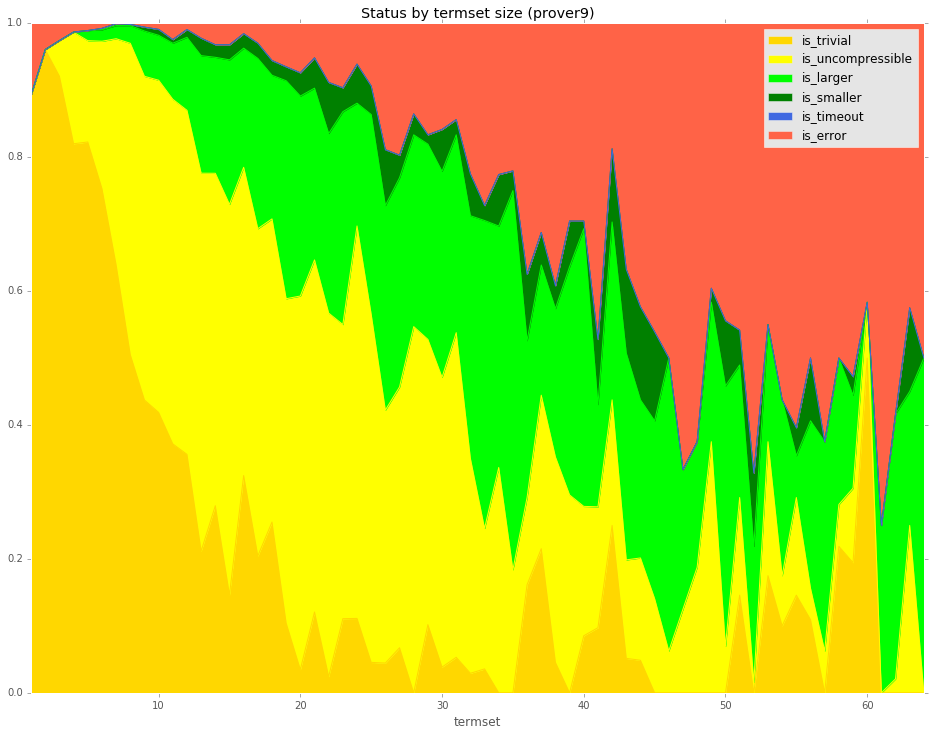

In [19]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_trivial'] = data.status.str.endswith('termset_trivial')
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_trivial & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_trivial', 'is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['gold', 'yellow', 'lime', 'green', 'royalblue', 'tomato'])

In [20]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
792739,SumOfOnesF2ExampleProof(12),1_dtable,42.0,257.0,NaN
615859,SumOfOnesF2ExampleProof(14),1_dtable,46.0,358.0,NaN
16846,SumOfOnesF2ExampleProof(22),1_maxsat,66.0,911.0,NaN
8232,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_1_maxsat,4.0,22.0,68.0
8235,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_dtable,4.0,22.0,68.0
8238,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_maxsat,4.0,22.0,68.0
8236,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,2_2_maxsat,4.0,22.0,68.0
8233,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,2_maxsat,4.0,22.0,68.0
8234,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,many_dtable,4.0,22.0,68.0
8239,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,many_dtable_ss,4.0,22.0,68.0


In [21]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
424369,proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...,2_maxsat,35.0,33.0,222.0
424375,proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...,many_dtable_ss,38.0,33.0,222.0
682148,proofs/Solutions/ALG/ALG074+1/SPASS---3.7.THM-...,2_2_maxsat,50.0,56.0,274.0
682145,proofs/Solutions/ALG/ALG074+1/SPASS---3.7.THM-...,2_maxsat,50.0,56.0,274.0
682151,proofs/Solutions/ALG/ALG074+1/SPASS---3.7.THM-...,many_dtable_ss,50.0,56.0,274.0
95939,proofs/Solutions/ALG/ALG235-1/Metis---2.3.UNS-...,1_dtable,30.0,35.0,213.0
95942,proofs/Solutions/ALG/ALG235-1/Metis---2.3.UNS-...,1_maxsat,21.0,35.0,213.0
95937,proofs/Solutions/ALG/ALG235-1/Metis---2.3.UNS-...,2_maxsat,27.0,35.0,213.0
454451,proofs/Solutions/ALG/ALG240-1/Metis---2.3.UNS-...,1_dtable,54.0,54.0,458.0
1069968,proofs/Solutions/ALG/ALG347-1/ET---0.2.UNS-CRf.s,1_1_maxsat,10.0,10.0,148.0


In [22]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
545936,LinearEqExampleProof(10),1_1_maxsat,65.0,11.0,NaN
512176,LinearEqExampleProof(11),1_1_maxsat,88.0,12.0,NaN
419416,LinearEqExampleProof(13),1_1_maxsat,85.0,14.0,NaN
135592,LinearEqExampleProof(17),1_1_maxsat,106.0,18.0,NaN
908904,LinearEqExampleProof(21),1_1_maxsat,118.0,22.0,NaN
625800,LinearEqExampleProof(22),1_1_maxsat,166.0,23.0,NaN
625806,LinearEqExampleProof(22),1_maxsat,131.0,23.0,NaN
625760,LinearEqExampleProof(23),1_1_maxsat,154.0,24.0,NaN
975968,LinearEqExampleProof(4),1_1_maxsat,26.0,5.0,NaN
975974,LinearEqExampleProof(4),1_maxsat,26.0,5.0,NaN


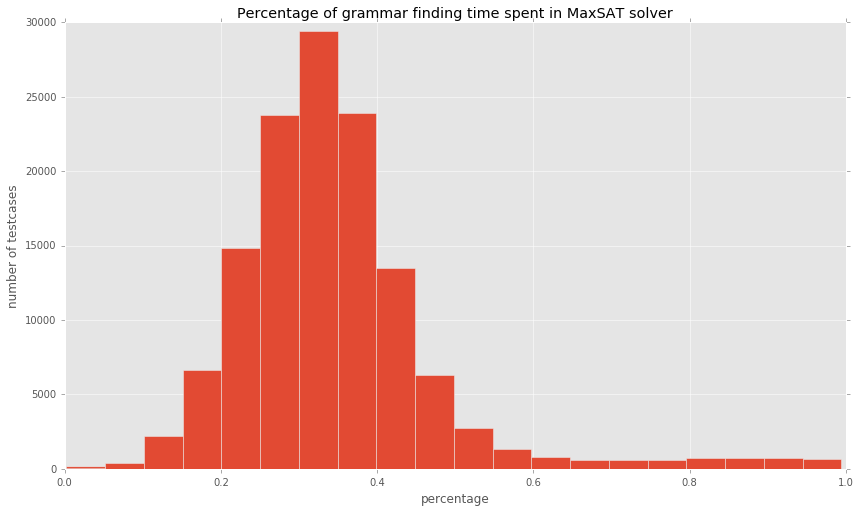

In [23]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')

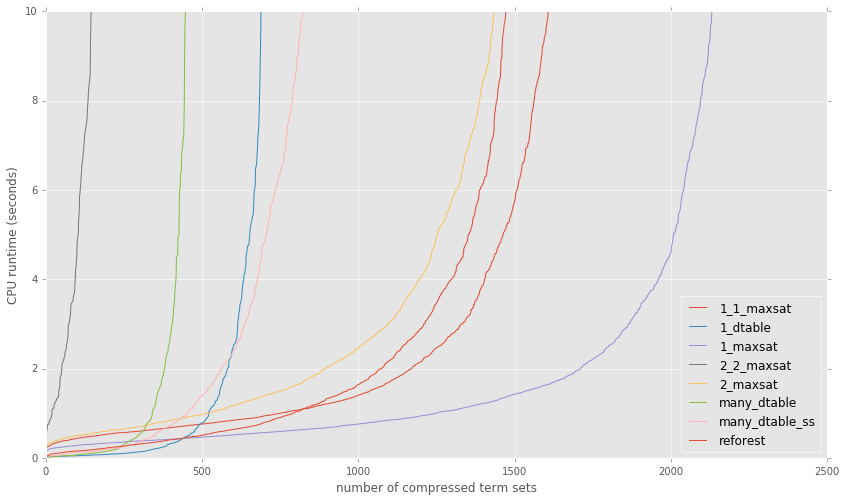

In [24]:
plt.figure(figsize=(14,8))
for method in methods:
    plt.plot(data[(data.method==method)&
                  (data.grammar_size>0)&
                  (data.grammar_size<0.75*data.termset)&
                  (data.termset_trivial==False)&
                  (data.file.str.contains('Solution'))
                 ].time_grammar.sort_values().values / 1000,
             label=method)
plt.xlabel('number of compressed term sets')
plt.ylabel('CPU runtime (seconds)')
plt.ylim(0,10)
plt.legend(loc='best')